<a href="https://colab.research.google.com/github/2022RSEC004/MachineLearning/blob/alzheimers/trial_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 141ms/step - accuracy: 0.3399 - loss: 1.7775 - val_accuracy: 0.5606 - val_loss: 1.2293
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 137ms/step - accuracy: 0.5872 - loss: 1.1764 - val_accuracy: 0.6135 - val_loss: 1.0787
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 136ms/step - accuracy: 0.6581 - loss: 0.9788 - val_accuracy: 0.6481 - val_loss: 1.0257
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.6915 - loss: 0.8837 - val_accuracy: 0.6752 - val_loss: 0.9448
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 134ms/step - accuracy: 0.7275 - loss: 0.7916 - val_accuracy: 0.6990 - val_loss: 0.8746
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 131ms/step - accuracy: 0.7408 - loss: 0.7402 - val_accuracy: 0.7016 - val_loss: 0.8789
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 133ms/step - accuracy: 0.7593 - loss: 0.6837 - val_accuracy: 0.7188 - val_loss: 0.8276
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 146s 138ms/step - accuracy: 0.7711 -

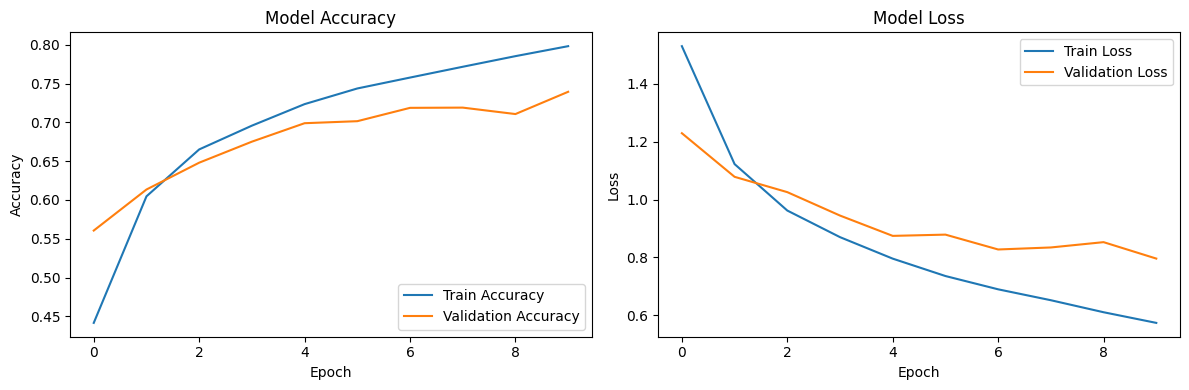

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


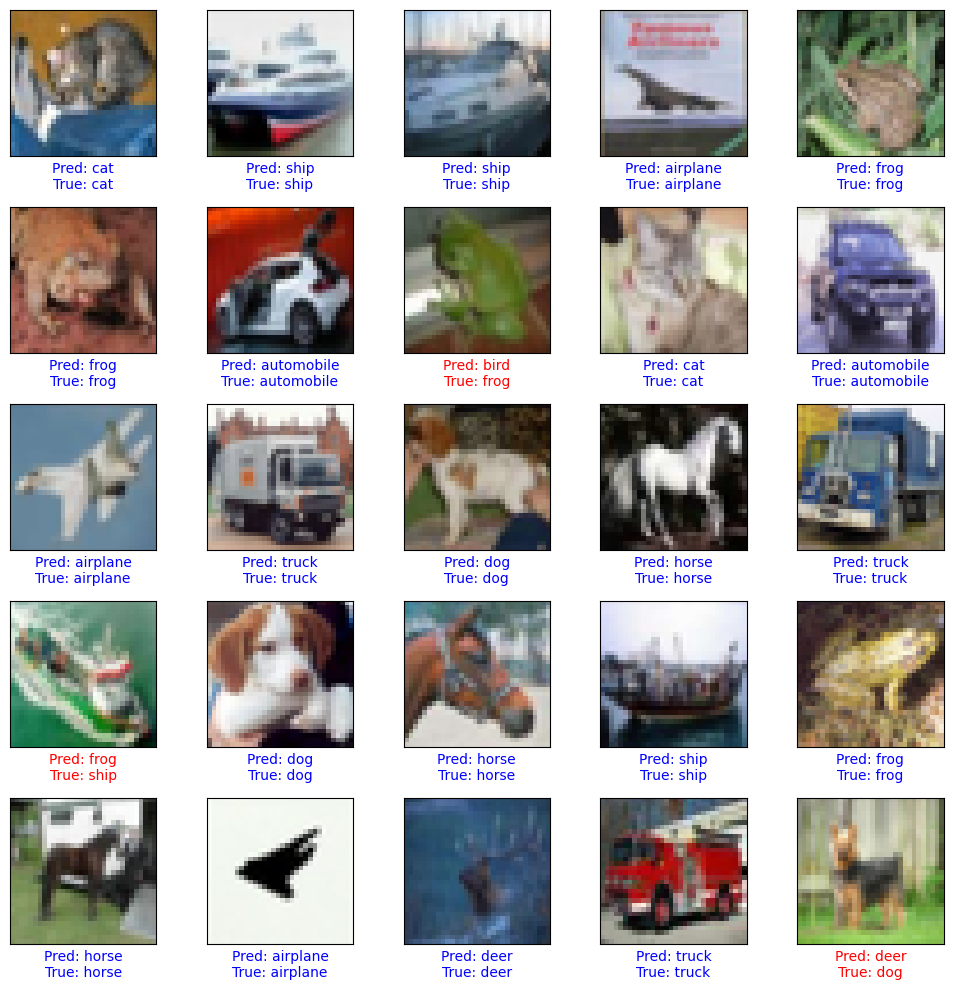

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the CIFAR-10 dataset
# CIFAR-10 consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
# There are 50000 training images and 10000 test images.
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)

# Build the CNN model
model = models.Sequential()

# Convolutional Layer 1
# 32 filters, each 3x3. Uses ReLU activation. Input shape is 32x32x3 (color images).
# 'same' padding adds padding to the input so that the output shape is the same as the input shape.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
# Max Pooling Layer 1
# Reduces spatial dimensions by taking the maximum value over a 2x2 window.
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
# 64 filters, each 3x3. Uses ReLU activation.
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# Max Pooling Layer 2
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
# 64 filters, each 3x3. Uses ReLU activation.
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# Max Pooling Layer 3
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers to feed into dense layers
model.add(layers.Flatten())

# Dense Layer 1
# Fully connected layer with 64 neurons and ReLU activation.
model.add(layers.Dense(64, activation='relu'))

# Output Layer
# Fully connected layer with 10 neurons (one for each class) and softmax activation
# to output probabilities for each class.
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
# Uses the Adam optimizer and Categorical Crossentropy loss (suitable for multi-class classification).
# Tracks accuracy during training.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model
# Trains for 10 epochs with a batch size of 64.
# Uses the test data for validation during training.
history = model.fit(train_images, train_labels_cat, epochs=10,
                    batch_size=64, validation_data=(test_images, test_labels_cat))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Make predictions
predictions = model.predict(test_images)

# Get the class with the highest probability for each prediction
predicted_classes = np.argmax(predictions, axis=1)

# Example of displaying some test images and their predicted labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    # The CIFAR10 labels are arrays, so you need to extract the single value
    true_label = test_labels[i][0]
    predicted_label = predicted_classes[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}', color=color)
plt.tight_layout()
plt.show()